In [67]:
# DESCRIPTION

# The used car market has significantly grown in recent times, with clients ranging from used car dealers and
# buyers.
# You are provided with a car evaluation dataset that has features like price, doors, safety, and so on.

# Objective: You are required to create a robust model that allows stakeholders to predict the condition of a 
#     used vehicle.

# Actions to Perform:

# Predict the condition of a vehicle based on its features.
# Plot the most important features.
# Train multiple classifiers and compare the accuracy.
# Evaluate the XGBoost model with K-fold cross-validation.

In [68]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
# DATASET
df = pd.read_csv('car_evaluation.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [71]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


/home/mypc/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

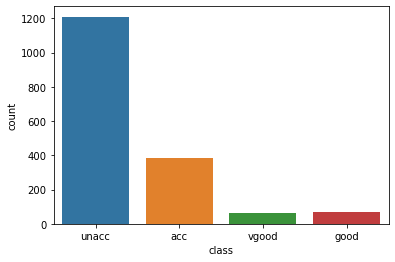

In [72]:
sns.countplot(df['class'])

In [73]:
# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for index in df:
    label = enc.fit_transform(df[index])
    df[index] = label  

In [91]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


/home/mypc/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

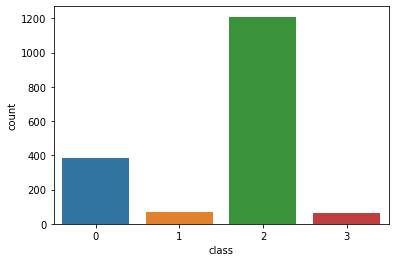

In [92]:
sns.countplot(df['class'])

In [75]:
X = df.drop('class', axis = 1)
target = df['class']

In [76]:
# SPLIT THE DATA
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=11)

In [77]:
# 1ST CLASSIFIER
ada_clf = AdaBoostClassifier(n_estimators=10)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=10)

In [78]:
# prediction
y_pred_ada = ada_clf.predict(x_test)

In [79]:
# accuracy
print(confusion_matrix(y_pred_ada, y_test))
print(classification_report(y_pred_ada, y_test))

[[ 43   7  35   0]
 [  0   0   0   0]
 [ 27   0 211   0]
 [  7   3   0  13]]
              precision    recall  f1-score   support

           0       0.56      0.51      0.53        85
           1       0.00      0.00      0.00         0
           2       0.86      0.89      0.87       238
           3       1.00      0.57      0.72        23

    accuracy                           0.77       346
   macro avg       0.60      0.49      0.53       346
weighted avg       0.79      0.77      0.78       346



/home/mypc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mypc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mypc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
# 2ND CLASSIFIER
grd_clf = GradientBoostingClassifier(n_estimators=10)
grd_clf.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=10)

In [81]:
# prediction
y_pred_grd = grd_clf.predict(x_test)

In [82]:
# accuracy
print(confusion_matrix(y_pred_grd, y_test))
print(classification_report(y_pred_grd, y_test))

[[ 44  10  11  13]
 [  0   0   0   0]
 [ 33   0 235   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.57        78
           1       0.00      0.00      0.00         0
           2       0.96      0.88      0.91       268
           3       0.00      0.00      0.00         0

    accuracy                           0.81       346
   macro avg       0.38      0.36      0.37       346
weighted avg       0.87      0.81      0.84       346



/home/mypc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mypc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mypc/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# 3RD CLASSIFIER
rnd_clf = RandomForestClassifier(n_estimators=10)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [84]:
# prediction
y_pred_rnd = rnd_clf.predict(x_test)

In [85]:
# accuracy
print(confusion_matrix(y_pred_rnd, y_test))
print(classification_report(y_pred_rnd, y_test))

[[ 71   1   6   1]
 [  2   8   0   0]
 [  3   0 240   0]
 [  1   1   0  12]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        79
           1       0.80      0.80      0.80        10
           2       0.98      0.99      0.98       243
           3       0.92      0.86      0.89        14

    accuracy                           0.96       346
   macro avg       0.91      0.89      0.90       346
weighted avg       0.96      0.96      0.96       346



In [86]:
# k-fold validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10, shuffle=True)

In [87]:
# 1ST CLASSIFIER
score = cross_val_score(ada_clf, X, target, cv = kf)
print(score)
print('Cross Validation=', score.mean())
print('Normal Accuracy=', accuracy_score(y_pred_ada, y_test))

[0.68208092 0.77456647 0.76878613 0.71676301 0.71676301 0.70520231
 0.77456647 0.73988439 0.72674419 0.74418605]
Cross Validation= 0.7349542949321146
Normal Accuracy= 0.7716763005780347


In [88]:
# 2ND CLASSIFIER
score = cross_val_score(grd_clf, X, target, cv=kf)
print(score)
print('Cross Validation=', score.mean())
print('Normal accuracy=', accuracy_score(y_pred_grd, y_test))

[0.79190751 0.70520231 0.74566474 0.74566474 0.79190751 0.7283237
 0.8265896  0.75144509 0.75       0.74418605]
Cross Validation= 0.7580891248823767
Normal accuracy= 0.8063583815028902


In [89]:
# 3RD CLASSIFIER
score = cross_val_score(rnd_clf, X, target, cv = kf)
print(score)
print('Cross Validation=', score.mean())
print('Normal accuracy=', accuracy_score(y_pred_rnd, y_test))

[0.95375723 0.95953757 0.99421965 0.94219653 0.93641618 0.96531792
 0.94797688 0.95953757 0.94186047 0.96511628]
Cross Validation= 0.9565936281758303
Normal accuracy= 0.9566473988439307


In [90]:
unique, counts = np.unique(y_pred_rnd, return_counts=True)
print(dict(zip(unique, counts)))

{0: 79, 1: 10, 2: 243, 3: 14}
